# Chapter 10 - Introduction to Artificial Neural Networks with Keras

In [1]:
import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
print('Python version:    ', sys.version_info)
print('TensorFlow version:', tf.__version__)
print('Keras version:     ', keras.__version__)

Python version:     sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
TensorFlow version: 2.0.0
Keras version:      2.2.4-tf


**<font color='red'>Main content:</font>**
1. introduce ANNs, starting with a quick tour of the very first ANN architectures, leading up to MLPs (Multi-Layer Perceptrons).

2. implement NNs using the popular Keras API.

ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks.

## 1 Artificial Neurons

We should drop the biological analogy (类比) altogether (e.g., saying **units** rather than neurons), lest (以免) we strict our creativity to biologically plausible (看似可信的) systems.

We are now witnessing yet another wave of interest in ANNs. A few good reasons to believe that this time is different:

+ **A huge quantity of data available** to train NNs, and ANNs often **outperform other ML techs** on very large and complex problems.


+ The **tremendous increase in computing power**, due to Moore's law (the number of components in integrated has doubled about every 2 years over the last 50 years), but also thanks to **gaming industry**, which has stimulated the production of powerful **GPU** cards by the millions. Moreover, **cloud platforms** have made this power accessible to everyone.


+ The training algorithms have been improved. 


+ Some theoretical limitations of ANNs have turned out to be benign in practice.


+ ANNs seem to have entered a virtuous circle (良性循环) of funding and process.

### 1.1 The Perceptron (感知机）

The **<font color='red'>perceptron</font>** is one of the simplest ANN architectures, based on a slightly different artificial neuron called a **<font color='red'>threshold logic unit (TLU)</font>** or sometimes a **<font color='red'>linear threshold unit (LTU)</font>**.

![threshold linear unit](./figs/chap10-figs/threshold-linear-unit.png)


The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The **TLU** computes a weighted sum of its inputs ($z = w_1x_1 + w_2x_2 + ⋯ + w_nx_n = x^Tw$), then applies a step function to that sum and outputs the result: $h_w(x) = step(z)$, where $z = x^Tw$.

The **most common step function used in Perceptrons** is the **<font color='red'>Heaviside step function</font>**. Sometimes the **<font color='red'>sign function</font>** is used instead.

$$ heaviside(z)= \begin{cases}
0, & \text {if z < 0} \\ 
1, & \text{if z $\geq$ 0} \end{cases}
$$

$$ sgn(z)= \begin{cases}
-1, & \text {if z < 0} \\ 
0, & \text {if z = 0} \\
1, & \text{if z $\gt$ 0} \end{cases}
$$

<br>

**A single TLU can be used for simple linear binary classification.**


A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a **<font color='red'>fully connected layer</font>**, or a **<font color='red'>dense layer</font>**. 

Computing the outputs of a fully connected layer:
$$h_{w,b}(X) = \phi(XW+b)$$

> $\phi$ is called the **activation function**: when the artificial units are TLUs, it's a step function.

<br>

**<font color='blue'>How is a Perceptron trained?</font>**

**Hebb's rule or Hebb's learning** -- “Cells that fire together, wire together”; that is, the connection weight between two neurons tends to increase when they fire simultaneously. Perceptrons are trained using a variant of this rule that takes into account the error made by the NN when it makes a prediction. **The Perceptron learning rule reinforces加强 connections that help reduce the error**. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that **produced a wrong prediction**, it **reinforces the connection weights from the inputs** that would have contributed to the correct prediction.

**Perceptron learning rule (weight update):**

$$w_{i, j}^{(next  step)}=w_{i, j} + \eta(y_j - \hat {y_{j}})x_i$$

+ $w_{i, j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.

+ $x_i$ is the $i^{th}$ input value of the current training instance.

+ $\hat {y_{j}}$ is the output of the $j^{th}$ output neuron for the current training instance.

+ $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.

+ $\eta$ is the learning rate.

<br>

**The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers)**. However, if the training instances are linearly separable, Rthis algorithm would converge to a solution. This is called the **<font color='red'>Perceptron convergence theorem</font>**.

In [3]:
# A `Perceptron` class with a single-TLU network in Sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
x = iris.data[:, (2, 3)]  # only two features
y = (iris.target == 0).astype(np.int)

perceptron_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_clf.fit(x, y)

perceptron_clf.predict([[2, 0.5]])

array([1])

**<font color='blue'>The Perceptron learning algorithm strongly resembles Stochastic Gradient Descent</font>**. In fact, Scikit-Learn’s `Perceptron` class is equivalent to using an `SGDClassifier` with the following hyperparameters: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (the learning rate), and `penalty=None` (no regularization).

Note that contrary to Logistic Regression classifiers, **Perceptrons do not output a class probability**; rather, they **make predictions based on a hard threshold**. **<font color='blue'>This is one reason to prefer Logistic Regression over Perceptrons.</font>**


**<font color='blue'>A serious weakness of Perceptrons</font>:** they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR)) classification problem. This is true of any other linear clf model (such as LR clf).

It turns out that some of the limitations of Perceptrons can be eliminated (消除) by stacking multiple Perceptrons. The resulting ANN is called a **<font color='red'>Multilayer Perceptron (MLP)</font>**. **An MLP can solve the XOR problem.**

> **XOR**: with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1.

![XOR](./figs/chap10-figs/XOR-classification-problem-and-an-MLP-that-solves-it.png)

> All connections have a weight equal to 1, except the four connections where the weight is shown.

### 1.2 The Multiplayer Perceptron and Backpropagation

An **<font color='red'>MLP</font>** is composed of one input layer, one or more layers of TLUs, called **<font color='red'>hidden layers</font>**, and one final layer of TLUs called the **<font color='red'>output layer</font>**. The layers close to the input layer are usually called the **<font color='red'>lower layers</font>**, and the ones close to the outputs are usually called the **<font color='red'>upper layers</font>**. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

![MLP](./figs/chap10-figs/mlp.png)

<div class="alert alert-block alert-info">
    <center><b>Note (FNN)</b></center><br> The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a <b>feedforward neural network (FNN)</b>.
</div>

When an ANN contains a deep stack of hidden layers, it is called a **<font color='red'>deep neural network (DNN)</font>**. The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. Even so, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

<br>

**<font color='red'>Train MLPs?</font>**

Use **<font color='red'>backpropagation training algorithm</font>**. In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just two **passes through the network (one forward, one backward)**, the backpropagation algorithm is able to **compute the gradient of the network’s error with regard to every single model parameter**. In other words, it can **find out how each connection weight and each bias term should be tweaked in order to reduce the error**. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

<div class="alert alert-block alert-info">
    <center><b>Note (Autodiff)</b></center><br> Automatically computing gradients is called <b>automatic differentiation</b>, or <b>autodiff</b>. There are various autodiff techniques, with different pros and cons(有不同的利弊). The one used by backpropagation is called <b>reverse-mode autodiff</b>. It is fast and precise, and is well suited when the function to differentiate has many variables (e.g., connection weights) and few outputs (e.g., one loss). If you want to learn more about autodiff, check out Appendix D.
</div>

<br>

**<font color='red'>Backpropagation training algorithm:</font>**
+ It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an **<font color='red'>epoch</font>**.


+ Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the **<font color='blue'>forward pass</font>**: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.


+ Next, the algorithm **measures the network’s output error** (i.e., it **uses a loss function** that compares the desired output and the actual output of the network, and returns some measure of the error).


+ Then it **computes how much each output connection contributed to the error**. This is done analytically by applying the **chain rule** (perhaps the most fundamental rule in calculus), which makes this step fast and precise.


+ The algorithm then **measures how much of these error contributions came from each connection in the layer below**, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (**hence the name of the algorithm**).


+ Finally, the algorithm **performs a Gradient Descent step to tweak all the connection weights in the network**, using the error gradients it just computed.

<br>

**<font color='red'>BP summary:</font>** for each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

<br>

<div class="alert alert-block alert-warning">
    <center><b>Warning (随机初始化权重的重要性)</b></center><br> <b>It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail.</b> For example, if you <b>initialize all weights and biases to zero</b>, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.
</div>

<br>

In order for this BP algorithm to work properly, its author made a key change: they **<font color='blue'>replaced the step function with the logistic (sigmoid) function</font>** (不止logistic 函数，其他激活函数也行). This was essential because the **step function contains only flat segments, so there is no gradient to work with** (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step.

+ **<font color='red'>logistic (sigmoid) function</font>**

$$\sigma(z) = \frac{1}{1+e^{-z}}$$


+ **<font color='red'>the hyperbolic tangent function</font>**

$$tanh(z) = 2\sigma(2z) - 1$$

S-shaped, continuous, and differentiable, but its **output value ranges from -1 to 1** (instead fo 0 to 1 in the case of the logistic/sigmoid function). This range **tends to make each layer's output more or less centered around 0 at the beginning of training, which often helps speed up convergence.**


+ **<font color='red'>the rectified linear unit function</font>**

$$ReLU(z) = max(0, z)$$

The ReLU function is continuous but unfortunately **not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around)**, and its derivative is 0 for z < 0. In practice, however, it **works very well and has the advantage of being fast to compute, so it has become the default**. Most importantly, the fact that it **does not have a maximum output value** helps reduce some issues during Gradient Descent.

**<font color='red'>Why need nonlinear activation function?</font>**

If you chain several linear transformations, all you get is a linear transformation. So, if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def relu(z):
    return np.maximum(0, z)


# scipy.misc.derivative
def derivative(f, z, eps=1e-6):
    return (f(z+eps) - f(z-eps)) / (2*eps)

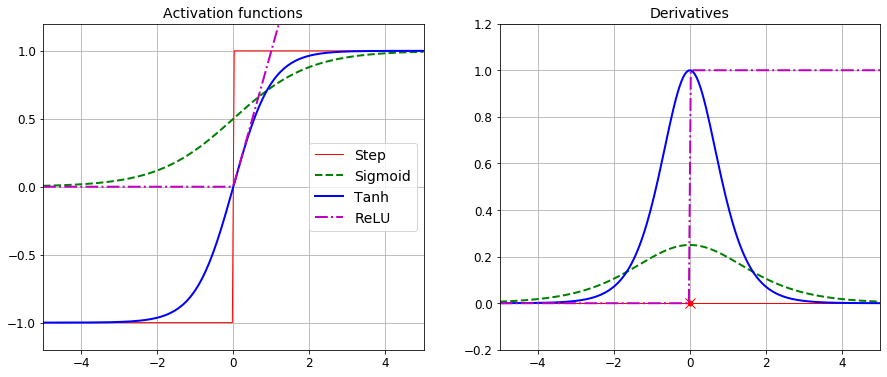

In [5]:
# activation function and its derivate
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### 1.3 Regression MLPs

**<font color='red'>Typical regression MLP architecture:</font>**

| **Hyperparameter** | **Typical value** |
| :--- | :--- |
|**input units**| one per input feature|
|**hidden layers**| depends on the problem, but typically 1 to 5|
|**units per hidden layer**| depends on the problem, but typically 10 to 100|
|**output units**| 1 per prediction dimension|
|**hidden activation**| ReLU (or SELU)|
|**ouput activation**|None, or ReLU/softplus (if positive outputs) or logistic/tanh (if bounded outputs)|
|**loss function**|MSE or MAE/Huber (if outliers)|

**<font color='blue'>How many outputs?</font>**
+ **predict a single value**, just need a single output unit: its output is the predicted value.


+ **predict multiple values at once (multivariate regression)**, need one unit per output dimension

<br>

**<font color='blue'>Which activation function should be used in regression mlps?</font>**

+ don't use any activation function for the output units, the outputs are free to **output any range of values**


+ use the ReLU or softplus activation function in the output layer to guarantee that the **outputs will be always be positive**


$$softplus(z) = log(1+e^z)$$


+ use the logistic function or the hyperbolic tangent, and then scale the labels to the appropriate range to guarantee that the **predictions will fall within a given range of values**

<br>

**<font color='blue'>Loss function used in regression mlps</font>**

typically **the mean squared error (MSE)**, but if you have a lot of outliers in the training set, you may prefer to use **the mean absolute error (MAE)** instead. Alternatively, you can use the **Huber loss**, which is a combination of both.


$$ huber(y, \hat y)= \begin{cases}
\frac{1}{2}(y-\hat y)^2, & \text {if $|y-\hat y| < \delta$, typically 1} \\ 
\delta |y-\hat y| - \frac{1}{2}\delta^2, & \text{otherwise} \end{cases}
$$

> **<font color='red'>Huber loss的优点: </font>** The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error.

### 1.4 Classification MLPs

**<font color='red'>Typical classification MLP architecture:</font>**

| **Hyperparameter** | **Binary classification** | **Multilabel binary classfication** | **Multiclass classification**|
| :-- | : -- | :-- | : -- |
|**input units**| one per input feature | one per input feature | one per input feature |
|**hidden layers**| depends on the problem (typically 1 to 5)| depends on the problem (typically 1 to 5| depends on the problem (typically 1 to 5|
|**units per hidden layer**| depends on the problem (typically 10 to 100)| depends on the problem (typically 10 to 100)| depends on the problem (typically 10 to 100)|
|**output units**|1|1 per label| 1 per class|
|**output layer activation**|sigmoid|sigmoid| softmax|
|**loss function**|cross entropy| cross entropy| cross entropy|

+ **binary classification**, just **need a single output neuron using the logistic (sigmoid) activation function**: the output will be a number between 0 and 1, which you can interpret as **the estimated probability of the positive class**. The estimated probability of the negative class is equal to one minus that number.


+ **multilabel binary classification tasks**, need multiple output units, both using the sigmoid activation function. Note that the output probabilities do not necessarily add up to 1, which lets the model output any combination of labels.


+ **multiclass classification**, need to have one output neuron per class, and you should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). 

<br>

Regarding the **loss function**, since we are predicting probability distributions, the **cross-entropy loss** (also called the **log loss**, see Chapter 4) is generally a good choice.

## 2 Implement MLPs with keras

TensorFlow itself now comes bundled with its own Keras implementation, `tf.keras`. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features.

<br>

![Keras vs tf.keras](./figs/chap10-figs/keras-vs-tf.keras.png)

<center>Two implementations of the Keras API: multibackend Keras (left) and tf.keras (right)</center>

> Both [Keras](https://keras.io/) and [Pytorch](https://pytorch.org/) APIs are inspired by [Scikit-Learn](https://pytorch.org/) and [Chainer](https://chainer.org/). Once you know Keras, it is not difficult to switch to PyTorch, if you ever want to.

### 2.1 Classifier using the Sequential API

**dataset:** Fashion MNIST

> a drop-in replacement of MNIST; has the exact same format as MNIST; more diverse, and the problem turns out to be significantly more challenging than MNIST

In [6]:
# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**<font color='red'>Keras vs Scikit-Learn when loading MNIST or Fashion MNIST:</font>**
+ every image is represented as a 28 × 28 array rather than a 1D array of size 784;


+ the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).

In [7]:
x_train[0][10:15]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0]], dtype=uint8)

> 非黑白图像。

In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
x_train.dtype

dtype('uint8')

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
# train the NN using Gradient Descent, so we must scale the input features
x_train = x_train / 255.0  # for simplicity
x_val, x_train = x_train[:5000], x_train[5000:]
y_val, y_train = y_train[:5000], y_train[5000:]

x_test = x_test / 255.0

In [12]:
# class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
    "Sneaker", "Bag", "Ankle boot"
]

In [13]:
class_names[y_train[0]]

'Coat'

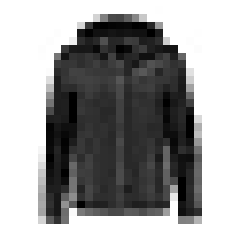

In [14]:
# plot an image
plt.imshow(x_train[0], cmap='binary')
plt.axis('off')
plt.show()

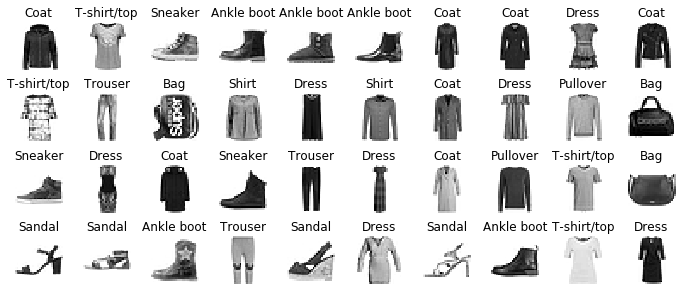

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [16]:
# build the model using the sequential API
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

+ **<font color='red'>Flatten layer</font>** converts each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. This layer does not have any parameters; it is just there to do some simple preprocessing.


+ You should specify the **`input_shape`** in thee first layer in the model, which doesn’t include the batch size, only the shape of the instances. You could add a **`tf.keras.layers.InputLayer`** as the first layer, setting `input_shape=(28,28)`.


+ `activation='relu'` is same as `tf.activation=keras.activations.relu`.

In [17]:
# Instead of adding the layers one by one above, 
# you can pass a list of layers when creating the Sequential model
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The **model’s `summary()`** method **displays all the model’s layers, including each layer’s name** (which is automatically generated unless you set it when creating the layer), its **output shape** (`None` means the batch size can be anything), and **its number of parameters**. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters.

**`Dense` layers often have a lot of parameters**. The first hidden layer has 784 x 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters. This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

In [19]:
model.layers

In [20]:
# fetch a layer by its index, or you can fetch it by name
hidden1 = model.layers[1]
hidden1

In [21]:
hidden1.name

'dense'

In [22]:
hidden1.non_trainable_variables

[]

In [23]:
hidden1.non_trainable_weights

[]

In [24]:
hidden1.trainable

True

In [25]:
hidden1.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [26]:
hidden1.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [27]:
model.get_layer('dense') is hidden1

True

In [28]:
# use `get_weights()` and `set_weights()` to access all the parameters of a layer
weights, biases = hidden1.get_weights()

In [29]:
weights  # shape: (784, 300)

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [30]:
biases  # shape: (300,)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The `Dense` layer's weights (<font color='blue'>kernel is another name for the matrix of connection weights</font>) were initialized randomly (to break symmetry), and the biases were initialized to zeros.

**<font color='red' size=4>Note:</font>**

The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify the `input_shape` when creating the first layer in a Sequential model. However, if you **do not specify the input shape, it’s OK**: Keras will **simply wait until it knows the input shape before it actually builds the model**. This will happen either when you **feed it actual data (e.g., during training)**, or when you **call its `build()` method**. **Until the model is really built, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model)**. So, if you know the input shape when creating the model, it is best to specify it.

In [31]:
keras.utils.plot_model(model, './figs/chap10-figs/mnist_model.png',
                       show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [32]:
# after the model is created, must call its `compile()` method
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              # a list of (multiple) metrics to compute during training and evaluation
              metrics=['acc'])

This is equivalent to

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

+ Use the **`loss='sparse_categorical_crossentropy'`** because we have **sparse labels** (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive (互斥的).


+ If instead we had **one target probability per class for each instance** (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would need to **use the `loss='categorical_crossentropy'` loss** instead.


+ use the **`'sigmoid'`** (i.e., logistic) activation function in the output layer, and **use `loss='binary_crossentropy'`**  when **doing binary classification** (with one or more binary labels)

In [34]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [35]:
# convert sparse labels (i.e., class indices) to one-hot vector labels
keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
np.argmax(keras.utils.to_categorical(y_train), axis=1)

array([4, 0, 7, ..., 3, 0, 5])

Regarding the optimizer, `"sgd"` means that we will train the model using simple Stochastic Gradient Descent. **<font color='blue'>When using the SGD optimizer, it is important to tune the learning rate.</font>** So, you will generally want to use `optimizer=keras.optimizers.SGD(lr=???)` to set the learning rate, rather than `optimizer='sgd'`, which defaults to `lr=0.01`.

In [37]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.7228 - acc: 0.7623 - val_loss: 0.5304 - val_acc: 0.8160
Epoch 2/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4838 - acc: 0.8323 - val_loss: 0.4494 - val_acc: 0.8454
Epoch 3/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.4379 - acc: 0.8475 - val_loss: 0.4173 - val_acc: 0.8548
Epoch 4/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4126 - acc: 0.8555 - val_loss: 0.3898 - val_acc: 0.8660
Epoch 5/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3930 - acc: 0.8626 - val_loss: 0.3987 - val_acc: 0.8610
Epoch 6/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.3776 - acc: 0.8672 - val_loss: 0.3730 - val_acc: 0.8732
Epoch 7/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3645 - acc: 0.8709 - val_loss: 0.3

+ `epochs` default to just 1, which would definitely not be enough to converge to a good solution.


+ Keras will measure the loss and the extra metrics on validation set (this is optional) at the end of each epoch, which is very useful to see how well the model really performs. **<font color='blue'>If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set).</font>**

At each epoch during training, Keras displays:

+ the number of instances processed so far (along with a progress bar)


+ the mean training time per sample


+ the loss and accuracy (or any other extra metrics passed) on both the training set and the validation set (optional).

**<font color='red' size=4>Tip:</font>**

Instead of passing a validation set using the `validation_data` argument, you could set `validation_split` to the ratio of the training set that you want Keras to use for validation. For example, `validation_split=0.1` tells Keras to use the **last 10%** of the data (before shuffling) for validation.

+ If **the training set was very skewed**, with some classes being overrepresented and others underrepresented, it would be useful to set the **<font color='red'>class_weight</font>** argument when calling the `fit()` method, which would **give a larger weight to underrepresented classes and a lower weight to overrepresented classes**. **These weights would be used by Keras when computing the loss**. 


+ If you need per-instance weights, set the **<font color='red'>sample_weight</font>** argument (**if both `class_weight` and `sample_weight` are provided, Keras multiplies them**). Per-instance weights could be **useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform**: you might want to give more weight to the former. You can also **provide sample weights (but not class weights) for the validation set** by adding them as a third item in the `validation_data` tuple.

**The `fit()` method returns a `History` object containing:**

+ the training parameters (`history.params`)


+ the list of epochs it went through (`history.epoch`)


+ most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any)

In [38]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
model.metrics_names

['loss', 'acc']

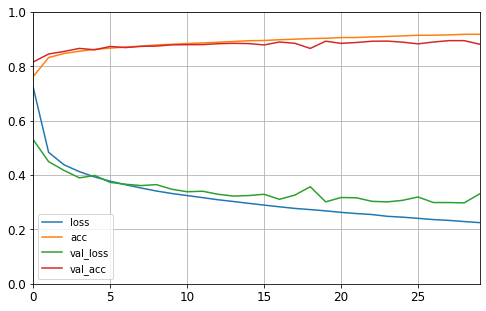

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

+ The training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good!


+ **The validation curves are close to the training curves, which means that there is not too much overfitting**.


+ In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, **the validation error is computed at the end of each epoch**, while **the training error is computed using a running mean during each epoch**. So **the training curve should be shifted by half an epoch to the left**. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training. **<font color='red'>When plotting the training curve, it should be shifted by half an epoch to the left.</font>**

The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that **the model has not quite converged yet, as the validation loss is still going down**, so you should probably continue training. It’s as simple as **<font color='red'>calling the `fit()` method again, since Keras just continues training where it left off</font>** (you should be able to reach close to 89% validation accuracy).

**Tune the hyperparameters:**
1. the first one to check is the learning rate (**always retune the learning rate after changing any hyperparameter**)
2. try another optimizer (if 1 does not help)
3. if still not great, try tuning model hyperparameters such as the number of layers, the number of units per layer, and the types of activation functions to use for each hidden layer.
4. can also try tuning other hyperparameters, such as the batch size (it can be set in the `fit()` method using the `batch_size` argument, which *defaults to 32*)

In [46]:
# Once you are satisfied with your model’s validation accuracy,
# you should evaluate it on the test set to estimate the generalization error
# before you deploy the model to production.
model.evaluate(x_test, y_test, verbose=2)  # `batch_size` and `sample_weight` are supported

10000/1 - 0s - loss: 0.3194 - acc: 0.8681


[0.36434496695995333, 0.8681]

<font color='blue'>It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set</font> (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). **Remember to resist the temptation to tweak the hyperparameters on the test set**, or else your estimate of the generalization error will be too optimistic.

In [47]:
# make predictions on new instances
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

> for each instance the model estimates one probability per class, from class 0 to class 9.

In [48]:
np.argmax(y_proba, axis=1)

array([9, 2, 1])

In [51]:
# only care about the class with the highest estimated probability (even if that probability is quite low)
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1])

In [52]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')